In [ ]:
from google.colab import drive
drive.mount('/drive')

import os
os.chdir('/drive/My Drive/DOTE6635')
print("当前工作目录:", os.getcwd())


Mounted at /drive
当前工作目录: /drive/My Drive/DOTE6635


In [ ]:
import pandas as pd

# Specify the encoding when reading the CSV file
catagory = pd.read_csv('catagory.csv', encoding='gbk')  # Try 'gbk' or 'latin-1' if 'gbk' doesn't work

# Get the number of rows and columns.
num_rows = catagory.shape[0]
num_cols = catagory.shape[1]

print(f"The 'catagory' DataFrame has {num_rows} rows and {num_cols} columns.")

# Get data types of each column.
print("\nData types of each column:")
print(catagory.dtypes)

# Display the first few rows of the DataFrame.
print("\nFirst few rows of the DataFrame:")
print(catagory.head())

The 'catagory' DataFrame has 40 rows and 3 columns.

Data types of each column:
Category     object
Product      object
Price($)    float64
dtype: object

First few rows of the DataFrame:
                   Category  \
0                FruitJuice   
1               FruitDrinks   
2  BabyMilkandMilkFlavoring   
3                      Soup   
4           CatFood-WetType   

                                             Product  Price($)  
0  Capri Sun Variety Pack with Fruit Punch, Straw...      9.43  
1  Kool Aid Jammers Variety Pack with Tropical Pu...      7.27  
2  Horizon Organic Shelf-Stable Whole Milk Boxes,...     13.98  
3  Maruchan Ramen Noodle Chicken Flavor Soup, 3 O...      9.97  
4  Purina Fancy Feast Chicken Feast Classic Grain...      0.88  


In [ ]:
# prompt: 对于每一个catagory以及对应的product，以及价格，生成一系列vary price 这个价格为对应价格vary the price from
# #  0 to 200% of the regular price, in 20% increments. This gives us 11 price points to test for each product
# #  ({0, 20%,..100%,..200%} of the regular price，所以，我们一共要生成11列vary price 分别对应0%到200% 最后每一个数组记录catagory，product，常规价格（即未变动前的价格）以及vary price， 列名分别为为vary price（20%），vary price（40%）以此类推，最后让我看一眼数据

from google.colab import drive
import os
import pandas as pd
import random

drive.mount('/drive')
os.chdir('/drive/My Drive/DOTE6635')
print("Current working directory:", os.getcwd())

try:
    catagory = pd.read_csv('catagory.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        catagory = pd.read_csv('catagory.csv', encoding='latin-1')
    except UnicodeDecodeError:
        catagory = pd.read_csv('catagory.csv', encoding='gbk')

data = []
for index, row in catagory.iterrows():
    category = row['Category']
    product = row['Product']
    original_price = row['Price($)']

    # Create varied prices
    varied_prices = [original_price * (i * 0.2) for i in range(11)]

    data.append([category, product, original_price] + varied_prices)

# Create column names
columns = ['Category', 'Product', 'Original Price']
for i in range(11):
    columns.append(f'Vary Price ({i*20}%)')

# Create the DataFrame
df = pd.DataFrame(data, columns=columns)

# Display the DataFrame
df


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
Current working directory: /drive/My Drive/DOTE6635


,Category,Product,Original Price,Vary Price (0%),Vary Price (20%),Vary Price (40%),Vary Price (60%),Vary Price (80%),Vary Price (100%),Vary Price (120%),Vary Price (140%),Vary Price (160%),Vary Price (180%),Vary Price (200%)
0,FruitJuice,"Capri Sun Variety Pack with Fruit Punch, Straw...",9.43,0.0,1.886,3.772,5.658,7.544,9.43,11.316,13.202,15.088,16.974,18.86
1,FruitDrinks,Kool Aid Jammers Variety Pack with Tropical Pu...,7.27,0.0,1.454,2.908,4.362,5.816,7.27,8.724,10.178,11.632,13.086,14.54
2,BabyMilkandMilkFlavoring,"Horizon Organic Shelf-Stable Whole Milk Boxes,...",13.98,0.0,2.796,5.592,8.388,11.184,13.98,16.776,19.572,22.368,25.164,27.96
3,Soup,"Maruchan Ramen Noodle Chicken Flavor Soup, 3 O...",9.97,0.0,1.994,3.988,5.982,7.976,9.97,11.964,13.958,15.952,17.946,19.94
4,CatFood-WetType,Purina Fancy Feast Chicken Feast Classic Grain...,0.88,0.0,0.176,0.352,0.528,0.704,0.88,1.056,1.232,1.408,1.584,1.76
5,PetSupplies-DogFood,"Purina Dog Chow Complete, Dry Dog Food for Adu...",29.17,0.0,5.834,11.668,17.502,23.336,29.17,35.004,40.838,46.672,52.506,58.34
6,Snacks-PotatoChips,"Lay¡¯s Classic Potato Snack Chips, Party Size,...",5.44,0.0,1.088,2.176,3.264,4.352,5.44,6.528,7.616,8.704,9.792,10.88
7,Snacks-TortillaChips,"Doritos Nacho Cheese Tortilla Snack Chips, Par...",5.94,0.0,1.188,2.376,3.564,4.752,5.94,7.128,8.316,9.504,10.692,11.88
8,Cereal-ReadytoEat,"Cinnamon Toast Crunch Breakfast Cereal, Crispy...",4.93,0.0,0.986,1.972,2.958,3.944,4.93,5.916,6.902,7.888,8.874,9.86
9,Cookies,"Little Debbie Oatmeal Creme Pies, 12 ct, 16.2 oz",2.68,0.0,0.536,1.072,1.608,2.144,2.68,3.216,3.752,4.288,4.824,5.36


In [ ]:
#
from google.colab import drive
import os
import pandas as pd

drive.mount('/drive')
os.chdir('/drive/My Drive/DOTE6635')
print("Current working directory:", os.getcwd())

try:
    ff = pd.read_csv('newresponses1.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        ff = pd.read_csv('newresponses1.csv', encoding='latin-1')
    except UnicodeDecodeError:
        ff = pd.read_csv('newresponses1.csv', encoding='gbk')

ff


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
Current working directory: /drive/My Drive/DOTE6635


,response
0,"The last time you purchased this product, it w..."
1,"30.00,0.00"
2,"Last Purchase Price,Current Price,Product Name..."
3,"Capri Sun Variety Pack with Fruit Punch, Straw..."
4,"$3.99, $0.00"
...,...
6595,"12.34, Pop-Ice Assorted Fruit Freezer Ice Pops..."
6596,"12.34, 12.34"
6597,"$12.34,Pop-Ice Assorted Fruit Freezer Ice Pops..."
6598,"12.34, 12.34"


In [ ]:
# prompt:  prompt:  prompt: 阅读路径下名为comresponsescsv的文件命名为ff 最后给我展示

from google.colab import drive
import os
import pandas as pd

drive.mount('/drive')
os.chdir('/drive/My Drive/DOTE6635')
print("Current working directory:", os.getcwd())

try:
    ff = pd.read_csv('comresponses.csv', encoding='utf-8') # Changed filename here
except UnicodeDecodeError:
    try:
        ff = pd.read_csv('comresponses.csv', encoding='latin-1') # Changed filename here
    except UnicodeDecodeError:
        ff = pd.read_csv('comresponses.csv', encoding='gbk') # Changed filename here

ff


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
Current working directory: /drive/My Drive/DOTE6635


,response
0,"Capri Sun Variety Pack with Fruit Punch, Straw..."
1,12.99
2,0.00
3,5.99
4,2.99$
...,...
21995,9.99
21996,8.99
21997,9.99$
21998,9.99$


In [ ]:
# prompt: # prompt: 对于ff，保留文本中所有数字

import pandas as pd
import re

# ... (Your existing code) ...

drive.mount('/drive')
os.chdir('/drive/My Drive/DOTE6635')
print("Current working directory:", os.getcwd())

try:
    ff = pd.read_csv('comresponses.csv', encoding='utf-8') # Changed filename here
except UnicodeDecodeError:
    try:
        ff = pd.read_csv('comresponses.csv', encoding='latin-1') # Changed filename here
    except UnicodeDecodeError:
        ff = pd.read_csv('comresponses.csv', encoding='gbk') # Changed filename here

# Extract all numbers from each cell in the DataFrame
for col in ff.columns:
  ff[col] = ff[col].astype(str).apply(lambda x: ''.join(re.findall(r'\d+', x)))

ff


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
Current working directory: /drive/My Drive/DOTE6635


,response
0,30600399
1,1299
2,000
3,599
4,299
...,...
21995,999
21996,899
21997,999
21998,999


In [ ]:
# prompt: 对于ff，仅保留最后四位

# ... (Your existing code) ...

try:
    ff = pd.read_csv('comresponses.csv', encoding='utf-8') # Changed filename here
except UnicodeDecodeError:
    try:
        ff = pd.read_csv('comresponses.csv', encoding='latin-1') # Changed filename here
    except UnicodeDecodeError:
        ff = pd.read_csv('comresponses.csv', encoding='gbk') # Changed filename here

# Extract all numbers from each cell in the DataFrame and keep the last four digits
for col in ff.columns:
    ff[col] = ff[col].astype(str).apply(lambda x: ''.join(re.findall(r'\d+', x))[-4:] if ''.join(re.findall(r'\d+', x)) else ''.join(re.findall(r'\d+',x)))

ff


,response
0,0399
1,1299
2,000
3,599
4,299
...,...
21995,999
21996,899
21997,999
21998,999


In [ ]:
# prompt: 首先，如果ff以0为开头，则删掉这个0，之后，如果ff为00或者000，则替换为0这个值，最后若这之中有超过8000的数值，则以其前一行进行代替，最后展示给我

# ... (Your existing code) ...



# Extract all numbers from each cell in the DataFrame
for col in ff.columns:
  ff[col] = ff[col].astype(str).apply(lambda x: ''.join(re.findall(r'\d+', x)))

# Process the numeric strings
for col in ff.columns:
    ff[col] = ff[col].astype(str).apply(lambda x: x[1:] if x.startswith('0') and len(x) > 1 else x)
    ff[col] = ff[col].astype(str).apply(lambda x: '0' if x in ('00', '000') else x)

    #Replace values greater than 8000 with the previous row's value
    for i in range(1, len(ff)):
        if int(ff.loc[i,col]) > 8000 and len(ff.loc[i,col]) > 0:
            ff.loc[i,col] = ff.loc[i-1, col]

ff


,response
0,399
1,1299
2,0
3,599
4,299
...,...
21995,999
21996,899
21997,999
21998,999


In [ ]:
# prompt: # prompt: 告诉我ff的第1730到1830行数据和第1到第30行数据

# Assuming 'ff' DataFrame is already loaded and processed as in the previous code.

# Display rows 1730-1830
print(ff.iloc[1729:1830])  # Note: Python uses 0-based indexing

# Display rows 1-30
print(ff.iloc[0:30])


     response
1729      199
1730      199
1731      199
1732      199
1733      199
...       ...
1825      549
1826      499
1827      399
1828      549
1829      549

[101 rows x 1 columns]
   response
0       399
1      1299
2         0
3       599
4       299
5       499
6       299
7       399
8       399
9       499
10      699
11      399
12      399
13      399
14      299
15      399
16        0
17      399
18      199
19      499
20      599
21      299
22        0
23     1299
24      399
25      299
26      399
27      399
28        0
29      349


In [ ]:
# prompt: # prompt: 将ff数据，每30行进行一次平均，比如说第1到第30平均作为新变量的第一个数据，第31到第60作为第二个，最后生成一个新的220行1列的数据

import pandas as pd
import numpy as np

# Assuming 'ff' DataFrame is already loaded and processed as in the previous code.
# and it's a single column DataFrame

# Convert the column to numeric, handling potential errors
try:
    ff[ff.columns[0]] = pd.to_numeric(ff[ff.columns[0]])
except ValueError:
    print("Warning: Non-numeric values encountered.  Rows causing issues will be assigned NaN.")
    ff[ff.columns[0]] = pd.to_numeric(ff[ff.columns[0]], errors='coerce')


# Calculate the rolling mean
window_size = 50
new_data = []
for i in range(0, len(ff), window_size):
    window = ff[ff.columns[0]][i:i + window_size]
    # Calculate mean, excluding NaN values
    mean_val = np.nanmean(window)
    new_data.append(mean_val)

# Create the new DataFrame
new_df = pd.DataFrame(new_data, columns=['Rolling Mean'])
new_df


,Rolling Mean
0,361.18
1,237.12
2,390.96
3,512.00
4,569.00
...,...
435,534.00
436,737.06
437,643.00
438,842.00


In [ ]:
# prompt:  prompt: 现在，我需要将刚刚得到的new_df增加一些信息要利用刚刚建立的df数组，首先新增一列vary price。第1行对应varyprice为0，第二行为0.2。第三行为0.4以此类推，第11行为2.0，第12行对应daryprice为0，以此类推。之后，增加一列regular price，第1到11行全部对应 df数组Original Price的第一行（这意味着这11行的值是相同的），第12到21行全部对应 df数组regular price的第2行 以此类推，

import pandas as pd
import numpy as np

# Assuming 'df' and 'new_df' DataFrames are already defined and loaded as in the previous code.

# Create 'vary_price' column
vary_prices = []
for i in range(len(new_df)):
    vary_prices.append(i % 11 * 0.2)  # Cycle through 0 to 2.0 then repeat
new_df['vary_price'] = vary_prices

# Create 'regular_price' column
regular_prices = []
for i in range(len(new_df)):
    original_price_index = i // 11 # Integer division to get the index in 'df'
    if original_price_index < len(df):
        regular_prices.append(df['Original Price'].iloc[original_price_index])
    else:
        regular_prices.append(np.nan) # Handle cases where original_price_index is out of bounds

new_df['regular_price'] = regular_prices

# Display the updated DataFrame
new_df


,Rolling Mean,vary_price,regular_price
0,361.18,0.0,9.43
1,237.12,0.2,9.43
2,390.96,0.4,9.43
3,512.00,0.6,9.43
4,569.00,0.8,9.43
...,...,...,...
435,534.00,1.2,4.68
436,737.06,1.4,4.68
437,643.00,1.6,4.68
438,842.00,1.8,4.68


In [ ]:
# prompt: 生成变量kk，第一列为new_df的vary——price这一列减去一，得到数据重命名为 varyprice，第二列为 new_df的rollingmean除以100再除以 regular_price之后再减去1 得到数据重命名为 competitor price

# Assuming 'new_df' DataFrame is already defined and loaded as in the previous code.

kk = pd.DataFrame()
kk['varyprice'] = new_df['vary_price'] - 1
kk['competitor price'] = (new_df['Rolling Mean'] / 100) / new_df['regular_price'] - 1
kk

,varyprice,competitor price
0,-1.0,-0.616988
1,-0.8,-0.748547
2,-0.6,-0.585408
3,-0.4,-0.457052
4,-0.2,-0.396607
...,...,...
435,0.2,0.141026
436,0.4,0.574915
437,0.6,0.373932
438,0.8,0.799145


In [ ]:
# prompt:  对于现在的kk变量的每个变量，第1，12，23，34，45行一直到第210行进行平均，平均得到的结果作为新变量 的第一行，第2，13，24，35，46行一直到第211行进行平均到的结果作为第2行，以此类推，第11，22，33，44，55行一直到第220行进行平均，最终得到一个11行2列的数据

import pandas as pd
import numpy as np

# Assuming 'kk' DataFrame is already defined and loaded as in the previous code.

def process_kk(kk):
    num_rows = len(kk)
    new_data = []
    for i in range(11):
        row_data = []
        indices = list(range(i, num_rows, 11))
        if indices:
          vary_price_mean = np.mean(kk['varyprice'].iloc[indices])
          last_price_mean = np.mean(kk['competitor price'].iloc[indices])
          row_data.extend([vary_price_mean, last_price_mean])
          new_data.append(row_data)
    new_df = pd.DataFrame(new_data, columns=['varyprice', 'competitor price'])
    return new_df

new_kk = process_kk(kk)
new_kk


,varyprice,competitor price
0,-1.0,-0.127204
1,-0.8,-0.339791
2,-0.6,-0.192293
3,-0.4,-0.116187
4,-0.2,-0.061376
5,0.0,0.059984
6,0.2,0.393141
7,0.4,0.478187
8,0.6,0.501432
9,0.8,0.569076


In [ ]:
# prompt: 生成一个新数据comdf，根据刚刚构建的new_df获得，第一列为new_df的ary price除以100之后减去1，仍命名为vary price， 第二列为 Average除以对于Regular price 之后再除以100在减去一， 命名为compete price

# Assuming 'new_df' is already defined as in the previous code

if 'new_df' in locals():
    comdf = pd.DataFrame()
    comdf['vary price'] = (new_df['Vary Price'] / 100) - 1
    comdf['compete price'] = (new_df['Average'] / new_df['Regular Price']) / 100 - 1
    print(comdf)
else:
    print("Error: 'new_df' DataFrame not found. Please make sure the previous code blocks have executed successfully.")


     vary price  compete price
0          -1.0      -0.616988
1          -0.8      -0.559236
2          -0.6      -0.585408
3          -0.4      -0.457052
4          -0.2      -0.396607
..          ...            ...
435         0.2       0.141026
436         0.4       0.574915
437         0.6       0.373932
438         0.8       0.799145
439         1.0       1.051410

[440 rows x 2 columns]


In [ ]:
#
import pandas as pd
import numpy as np

# Assuming 'comdf' is already defined and available in the current environment

if 'comdf' in locals():
    result_df = pd.DataFrame(columns=['vary price', 'compete price'])
    for i in range(11):
        rows_to_average = []
        for j in range(i, len(comdf), 11):
          if j < len(comdf):
            rows_to_average.append(j)
          else:
            break

        if rows_to_average:
            avg_vary_price = np.mean(comdf['vary price'].iloc[rows_to_average])
            avg_compete_price = np.mean(comdf['compete price'].iloc[rows_to_average])
            result_df = pd.concat([result_df, pd.DataFrame({'vary price': [avg_vary_price], 'compete price': [avg_compete_price]})], ignore_index=True)

    print(result_df)

else:
    print("Error: 'comdf' DataFrame not found. Please make sure the previous code blocks have executed successfully.")


    vary price  compete price
0         -1.0       0.025998
1         -0.8       0.307717
2         -0.6      -0.099779
3         -0.4      -0.079740
4         -0.2      -0.007275
5          0.0       0.087476
6          0.2       0.480600
7          0.4       0.481595
8          0.6       0.657405
9          0.8       0.847432
10         1.0       1.141165


<ipython-input-15-24e77b993ebe>:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, pd.DataFrame({'vary price': [avg_vary_price], 'compete price': [avg_compete_price]})], ignore_index=True)


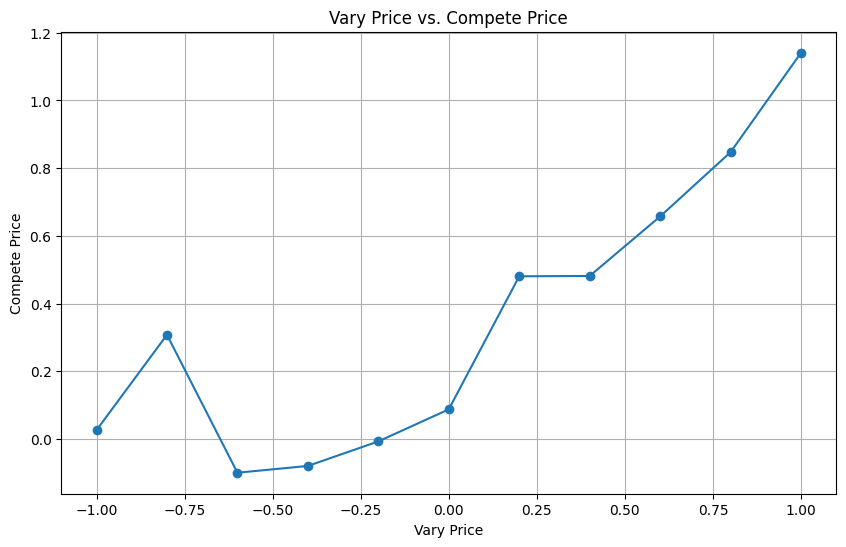

In [ ]:
# prompt: 画折线图，横轴为vary price， 纵轴为compete price

import matplotlib.pyplot as plt

# Assuming 'result_df' is already defined and available in the current environment

if 'result_df' in locals():
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.plot(result_df['vary price'], result_df['compete price'], marker='o')  # Create the line plot
    plt.xlabel('Vary Price')
    plt.ylabel('Compete Price')
    plt.title('Vary Price vs. Compete Price')
    plt.grid(True)  # Add grid lines for better readability
    plt.show()
else:
    print("Error: 'result_df' DataFrame not found. Please make sure the previous code blocks have executed successfully.")
